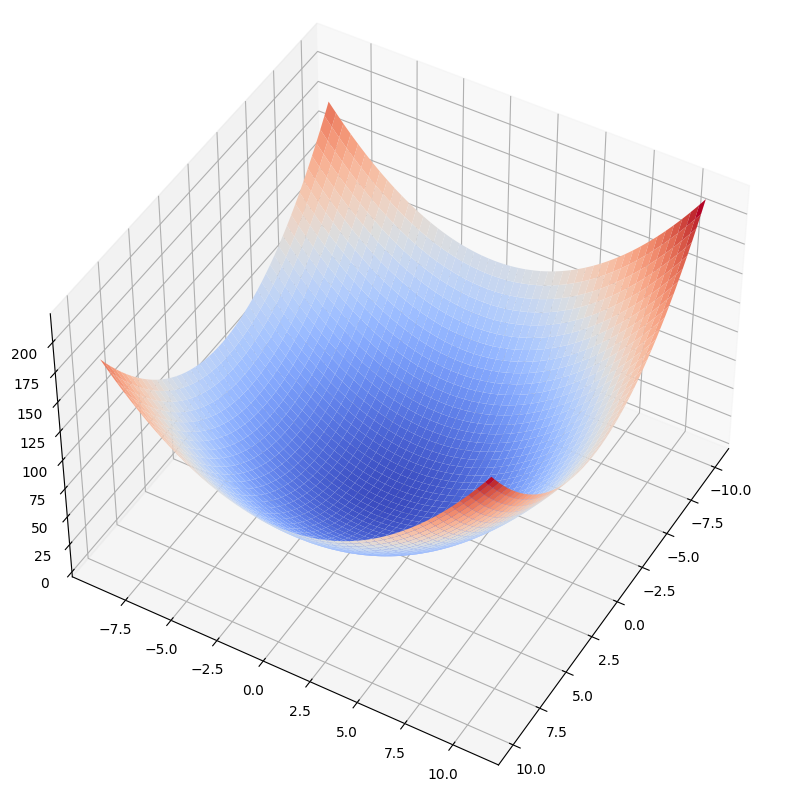

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

def func(x):
    return x[0]**2+x[1]**2

x = np.arange(-10, 10, 0.1)
y = np.arange(-9, 11, 0.1)
#z = np.array([func(x[i],y[i]) for i in range(len(x))]) 

fig = plt.figure(figsize=[15, 10])
ax =  fig.add_subplot(projection='3d')
ax.view_init(45, 30)

X, Y = np.meshgrid(x, y)
Z = func([X, Y])
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

In [78]:
!pip install numdifftools

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 464.3 kB/s eta 0:00:001.6 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [191]:
import numdifftools as nd

def grad_vector(x, y):
    g = nd.Gradient(func, order = 1)([x, y])
    return g

[-0.9998  3.9992]
[-0.79966  3.19864]


In [326]:
def SGD_momentum(lr, betta, theta_prev):
    
    epsilon = 1e-6
    sequence_x, sequence_y, dif1, dif2 = [], [], [], []
    c = 1
    
    V_next = (1-betta)*grad_vector(theta_prev[0],theta_prev[1])
    theta_next = np.subtract(theta_prev, lr*V_next)
    sequence_x.append(theta_next[0])
    sequence_y.append(theta_next[1])
    dif1.append(np.subtract(theta_next[0], theta_prev[0]))
    dif2.append(np.subtract(theta_next[1], theta_prev[1]))
    
    while np.linalg.norm(np.subtract(theta_next, theta_prev)) > epsilon:
        
        theta_prev = theta_next
        V_prev = V_next
        
        V_next = V_prev*betta + (1-betta)*grad_vector(theta_prev[0],theta_prev[1])
        theta_next = np.subtract(theta_prev, lr*V_next)

        c += 1
        sequence_x.append(theta_next[0])
        sequence_y.append(theta_next[1])
        dif1.append(np.subtract(theta_next[0], theta_prev[0]))
        dif2.append(np.subtract(theta_next[1], theta_prev[1]))
        
    return (theta_next, c, sequence_x, sequence_y, dif1, dif2)

In [325]:
def Adam(lr, betta_1, betta_2, E, theta_prev):
    
    epsilon = 1e-6
    sequence_x, sequence_y, dif1, dif2 = [], [], [], []
    c = 1
    
    V_next = (1-betta_1)*grad_vector(theta_prev[0],theta_prev[1])
    S_next = (1-betta_2)*grad_vector(theta_prev[0],theta_prev[1])**2
    theta_next = np.subtract(theta_prev, lr/(S_next**0.5+E)*V_next)
    
    sequence_x.append(theta_next[0])
    sequence_y.append(theta_next[1])
    dif1.append(np.subtract(theta_next[0], theta_prev[0]))
    dif2.append(np.subtract(theta_next[1], theta_prev[1]))
    
    while np.linalg.norm(np.subtract(theta_next, theta_prev)) > epsilon:
        
        theta_prev = theta_next
        V_prev = V_next
        S_prev = S_next
        
        V_next = V_prev*betta_1 + (1-betta_1)*grad_vector(theta_prev[0],theta_prev[1])
        S_next = S_prev*betta_2 + (1-betta_2)*grad_vector(theta_prev[0],theta_prev[1])**2

        theta_next = np.subtract(theta_prev, lr/(S_next**0.5+E)*V_next)
        
        c += 1
        sequence_x.append(theta_next[0])
        sequence_y.append(theta_next[1])
        dif1.append(np.subtract(theta_next[0], theta_prev[0]))
        dif2.append(np.subtract(theta_next[1], theta_prev[1]))
        
    return (theta_next, c, sequence_x, sequence_y, dif1, dif2)

In [332]:
def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    #plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()
    
def results(best, iters, Xs, Ys):
    print('Minimum (x,y) from gradient descent: %s' %  best)
    print('Number of gradient descent iterations: %s' %iters, '\n')
    contour_plot(Xs,Ys, np.array([6,2]))

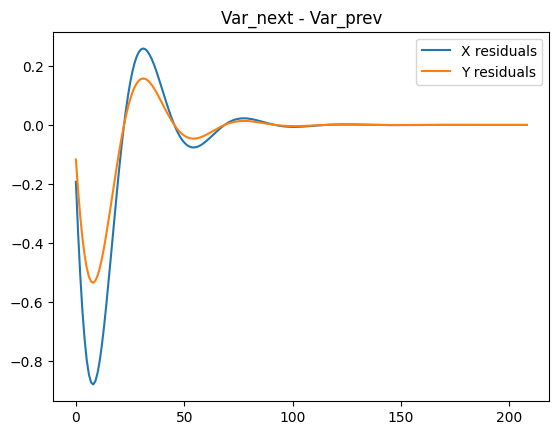

------------------ 
SGD momentum:
Minimum (x,y) from gradient descent: [-1.60412012e-04 -9.75172823e-05]
Number of gradient descent iterations: 209 



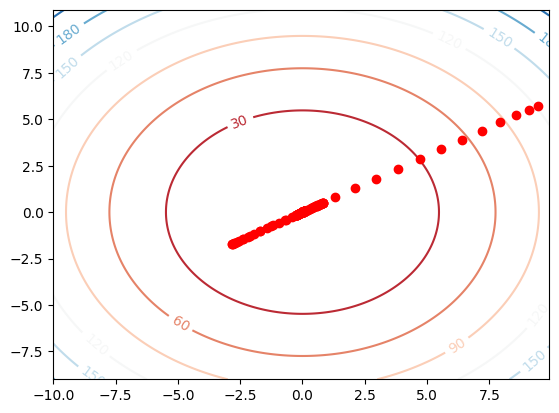

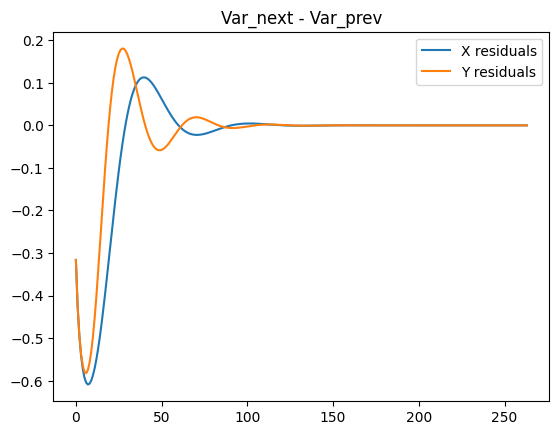

------------------ 
Adam:
Minimum (x,y) from gradient descent: [-4.39404836e-06 -1.65580816e-06]
Number of gradient descent iterations: 264 



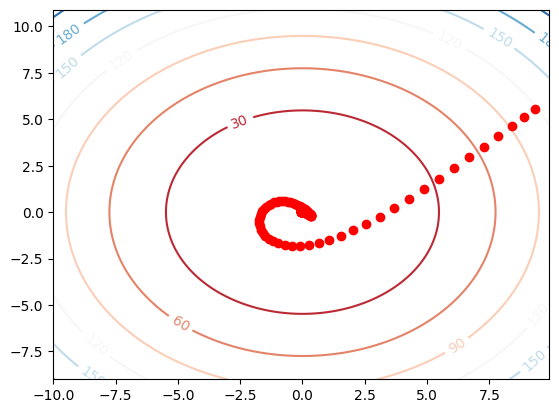

In [334]:
start_x = np.random.uniform(-10, 10)
start_y = np.random.uniform(-9, 11)
for alg in ['SGD momentum', 'Adam']:
    if alg == 'SGD momentum':
        best, iters, Xs, Ys, dif1, dif2 = SGD_momentum(1e-1, 0.9, np.array([start_x, start_y]))
    else:
        best, iters, Xs, Ys, dif1, dif2 = Adam(1e-1, 0.9, 0.999, 1e-08, np.array([start_x, start_y]))
    x = [i for i in range(iters)]
    plt.plot(x, dif1, label = 'X residuals')
    plt.plot(x, dif2, label = 'Y residuals')
    plt.title("Var_next - Var_prev")
    plt.legend()
    plt.show()
    print('-'*18, f'\n{alg}:')
    results(best, iters, Xs, Ys)

## Conclusion:
Two of the most common moddifications of SGD were implemented. Both of them are capable of finding (local) minima of the given function, however Adam algorithm, taking more steps, gives better accuracy (in some cases in 10s and 100s of times, it depends on initial conditions). The difference in amount of iteration is caused by the fact, that Adam also "investigates" the found point's neighborhood to prove it's the one. So the final choice of algortim totally depends on researcher wheter they want to save time or to get the best minimum (maximum). 